In [188]:
import pandas as pd
import matplotlib.pyplot as plt

In [189]:
df = pd.read_csv("data.csv", names=["x1", "x2"])
df

,x1,x2
0,-0.0824,0.9435
1,0.0913,0.9575
2,0.0476,1.0683
3,0.2311,1.0452
4,0.2269,0.9615
...,...,...
96,-0.5031,1.8191
97,-0.3340,1.8515
98,-0.3200,1.9158
99,-0.2074,1.9929


In [190]:
m = 4
iters = 11
center_points = df.sample(m).reset_index(drop=True)
df["nearest_center"] = None
center_points

,x1,x2
0,0.2717,1.0570
1,0.4601,-1.3957
2,0.9918,-1.0194
3,-0.9805,-1.2422


In [191]:
for _ in range(iters):
    for i, row in df.iterrows():
        distances = {}
        for j, center_point in center_points.iterrows():
            distance = (
                               (row["x1"] - center_point["x1"])**2
                               +(row["x2"] - center_point["x2"])**2
                       )**0.5
            distances[j] = distance
        min_center = min(distances, key=distances.get)
        df.at[i, "nearest_center"] = min_center
    groups_id = df['nearest_center'].unique()
    groups = df.groupby(['nearest_center'])
    for group_id in groups_id:
        group = groups.get_group((group_id,))

        if group.shape[0] == 0:
            continue
        center_points.loc[group_id, "x1"] = group["x1"].mean()
        center_points.loc[group_id, "x2"] = group["x2"].mean()


In [192]:
df

,x1,x2,nearest_center
0,-0.0824,0.9435,0
1,0.0913,0.9575,0
2,0.0476,1.0683,0
3,0.2311,1.0452,0
4,0.2269,0.9615,0
...,...,...,...
96,-0.5031,1.8191,0
97,-0.3340,1.8515,0
98,-0.3200,1.9158,0
99,-0.2074,1.9929,0


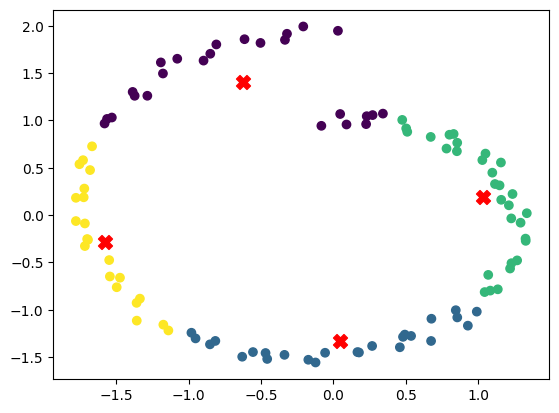

In [193]:
plt.scatter(df["x1"], df["x2"], c=df["nearest_center"])
plt.scatter(center_points["x1"], center_points["x2"], c="red", s=100, marker="X")
plt.show()